In [1]:
import pandas as pd
import re
import os

df=pd.read_excel(r"C:\Users\polpi\Desktop\data science\project\project_1\all codes\extracted_data.xlsx")
df

,Name,Age,Qualification,Subject Area,Place of Education,Coding Language,Spoken Language,Skill Set,Years of Work Experience,Keyword_Category
0,Anil Kumar,NaN,B.Tech,Engineering,"Velagapudi Siddhartha Engineering College, Vij...","SQL, T SQL",NaN,SQL T SQL Microsoft Business Intelligence MSB...,2.40,Workday
1,Aradhana Tripathi,NaN,"MCA, Post Graduate Diploma in Data Science",Computer Applications & Information Technology,"AKS University, IIIT Bangalore","SQL, SAS, R, Python",NaN,SQL SAS R Python MS SQL Server T SQL AWS RDS ...,7.00,Workday
2,Buddha Vamsi,29.0,B.Tech(CSE),Computer Science,JNTUK University,"Java, Python, etc. (NA)","English, Telugu",Database Engineer with experience in SQL PLSQ...,2.11,Workday
3,ChinnaSubbarayuduM,NaN,Bsc(Computers),Computers,"Yogi Vemana University,Kadapa.","XML, SQL, Basic shell scripting",Indian,Chinna Subbarayudu M has skills in Workday HC...,5.10,Workday
4,Gopi Krishna,30.0,B.Tech,Engineering,JNTU K University,"XML, XSLT","English, Telugu, Kannada",Workday HCM Reporting and Integrations XML XS...,3.00,Workday
...,...,...,...,...,...,...,...,...,...,...
74,SSKumar,NaN,"MCA, B.Tech (PE)",Computer Science and Engineering,"Bharath University, Chennai","XML, XSLT, People Code",NaN,Proficient in XML XSLT SOAP Web services Work...,6.00,Workday
75,Tatikonda Kiran Kumar,29.0,"MCA, B.Com",Computer Science,SV University,SQL Server,"English, Telugu",Microsoft SQL Server Development Coding langu...,3.20,Workday
76,Venkateswarlu B Hexaware,31.0,B. Tech,Technology,JNTUH,"XML, XSLT, X Path",NaN,Workday HCM Workday Advanced Report Writer Co...,7.00,Workday
77,Vinay Kumar,28.0,M.B.A.,Business Administration,Narayana Engineering College,"XML, XSLT, Studio",NaN,Workday skills Reports Studio Workday Busines...,4.20,Workday


In [2]:
df['Coding Language'] = df['Coding Language'].fillna('')
df['Coding Language'] = df['Coding Language'].str.replace(r'[^A-Za-z0-9+ .]', '', regex=True).str.upper()

#Update 'Keyword_Category' based on the content of 'Coding Language'
def update_category(row):
    coding_language = row['Coding Language']  # Get the Coding Language column
    if 'REACT' in coding_language:
        return 'React Developer'
    elif 'ORACLE' in coding_language or 'PEOPLESOFT' in coding_language:
        return 'Peoplesoft'
    elif 'SQL' in coding_language:
        return 'SQL Developer'
    return row['Keyword_Category']  # Leave unchanged if no conditions are met

df['Keyword_Category'] = df.apply(update_category, axis=1)
df


,Name,Age,Qualification,Subject Area,Place of Education,Coding Language,Spoken Language,Skill Set,Years of Work Experience,Keyword_Category
0,Anil Kumar,NaN,B.Tech,Engineering,"Velagapudi Siddhartha Engineering College, Vij...",SQL T SQL,NaN,SQL T SQL Microsoft Business Intelligence MSB...,2.40,SQL Developer
1,Aradhana Tripathi,NaN,"MCA, Post Graduate Diploma in Data Science",Computer Applications & Information Technology,"AKS University, IIIT Bangalore",SQL SAS R PYTHON,NaN,SQL SAS R Python MS SQL Server T SQL AWS RDS ...,7.00,SQL Developer
2,Buddha Vamsi,29.0,B.Tech(CSE),Computer Science,JNTUK University,JAVA PYTHON ETC. NA,"English, Telugu",Database Engineer with experience in SQL PLSQ...,2.11,Workday
3,ChinnaSubbarayuduM,NaN,Bsc(Computers),Computers,"Yogi Vemana University,Kadapa.",XML SQL BASIC SHELL SCRIPTING,Indian,Chinna Subbarayudu M has skills in Workday HC...,5.10,SQL Developer
4,Gopi Krishna,30.0,B.Tech,Engineering,JNTU K University,XML XSLT,"English, Telugu, Kannada",Workday HCM Reporting and Integrations XML XS...,3.00,Workday
...,...,...,...,...,...,...,...,...,...,...
74,SSKumar,NaN,"MCA, B.Tech (PE)",Computer Science and Engineering,"Bharath University, Chennai",XML XSLT PEOPLE CODE,NaN,Proficient in XML XSLT SOAP Web services Work...,6.00,Workday
75,Tatikonda Kiran Kumar,29.0,"MCA, B.Com",Computer Science,SV University,SQL SERVER,"English, Telugu",Microsoft SQL Server Development Coding langu...,3.20,SQL Developer
76,Venkateswarlu B Hexaware,31.0,B. Tech,Technology,JNTUH,XML XSLT X PATH,NaN,Workday HCM Workday Advanced Report Writer Co...,7.00,Workday
77,Vinay Kumar,28.0,M.B.A.,Business Administration,Narayana Engineering College,XML XSLT STUDIO,NaN,Workday skills Reports Studio Workday Busines...,4.20,Workday


In [3]:
df['Keyword_Category'] = df['Keyword_Category'].str.replace("ReactJS Developer", "React Developer", regex=False)

In [4]:
output_path = r'C:\Users\polpi\Desktop\data science\project\project_1\EDA1\resume.xlsx'
df.to_excel(output_path, index=False)

print(f"Updated file saved to {output_path}")

Updated file saved to C:\Users\polpi\Desktop\data science\project\project_1\EDA1\resume.xlsx


In [5]:
dfna = df.copy()
dfna['Years of Work Experience']= dfna['Years of Work Experience'].fillna('0')
dfna

,Name,Age,Qualification,Subject Area,Place of Education,Coding Language,Spoken Language,Skill Set,Years of Work Experience,Keyword_Category
0,Anil Kumar,NaN,B.Tech,Engineering,"Velagapudi Siddhartha Engineering College, Vij...",SQL T SQL,NaN,SQL T SQL Microsoft Business Intelligence MSB...,2.4,SQL Developer
1,Aradhana Tripathi,NaN,"MCA, Post Graduate Diploma in Data Science",Computer Applications & Information Technology,"AKS University, IIIT Bangalore",SQL SAS R PYTHON,NaN,SQL SAS R Python MS SQL Server T SQL AWS RDS ...,7.0,SQL Developer
2,Buddha Vamsi,29.0,B.Tech(CSE),Computer Science,JNTUK University,JAVA PYTHON ETC. NA,"English, Telugu",Database Engineer with experience in SQL PLSQ...,2.11,Workday
3,ChinnaSubbarayuduM,NaN,Bsc(Computers),Computers,"Yogi Vemana University,Kadapa.",XML SQL BASIC SHELL SCRIPTING,Indian,Chinna Subbarayudu M has skills in Workday HC...,5.1,SQL Developer
4,Gopi Krishna,30.0,B.Tech,Engineering,JNTU K University,XML XSLT,"English, Telugu, Kannada",Workday HCM Reporting and Integrations XML XS...,3.0,Workday
...,...,...,...,...,...,...,...,...,...,...
74,SSKumar,NaN,"MCA, B.Tech (PE)",Computer Science and Engineering,"Bharath University, Chennai",XML XSLT PEOPLE CODE,NaN,Proficient in XML XSLT SOAP Web services Work...,6.0,Workday
75,Tatikonda Kiran Kumar,29.0,"MCA, B.Com",Computer Science,SV University,SQL SERVER,"English, Telugu",Microsoft SQL Server Development Coding langu...,3.2,SQL Developer
76,Venkateswarlu B Hexaware,31.0,B. Tech,Technology,JNTUH,XML XSLT X PATH,NaN,Workday HCM Workday Advanced Report Writer Co...,7.0,Workday
77,Vinay Kumar,28.0,M.B.A.,Business Administration,Narayana Engineering College,XML XSLT STUDIO,NaN,Workday skills Reports Studio Workday Busines...,4.2,Workday


In [6]:
save_path = r"C:\Users\polpi\Desktop\data science\project\project_1\EDA1\dfna.csv"
dfna.to_csv(save_path, index=False)
print(f"DataFrame saved successfully to {save_path}")

DataFrame saved successfully to C:\Users\polpi\Desktop\data science\project\project_1\EDA1\dfna.csv


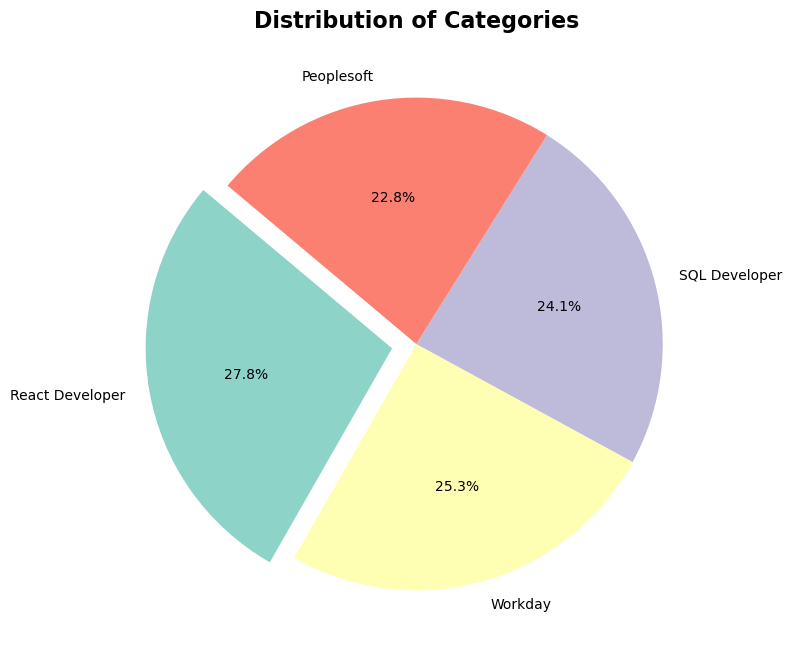

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 
category_counts = dfna['Keyword_Category'].value_counts()
explode = [0.1 if i == 0 else 0 for i in range(len(category_counts))]
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=sns.color_palette('Set3', len(category_counts)))
plt.title('Distribution of Categories', fontsize=16, fontweight='bold')
plt.show()

C:\Users\polpi\AppData\Local\Temp\ipykernel_15268\1580010521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


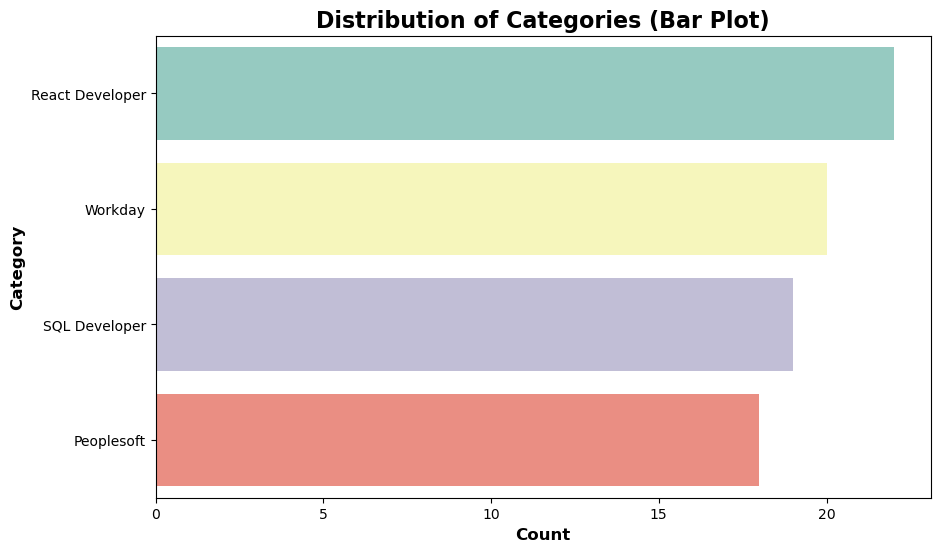

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=category_counts.values, 
    y=category_counts.index, 
    palette="Set3"
)
plt.title('Distribution of Categories (Bar Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Category', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

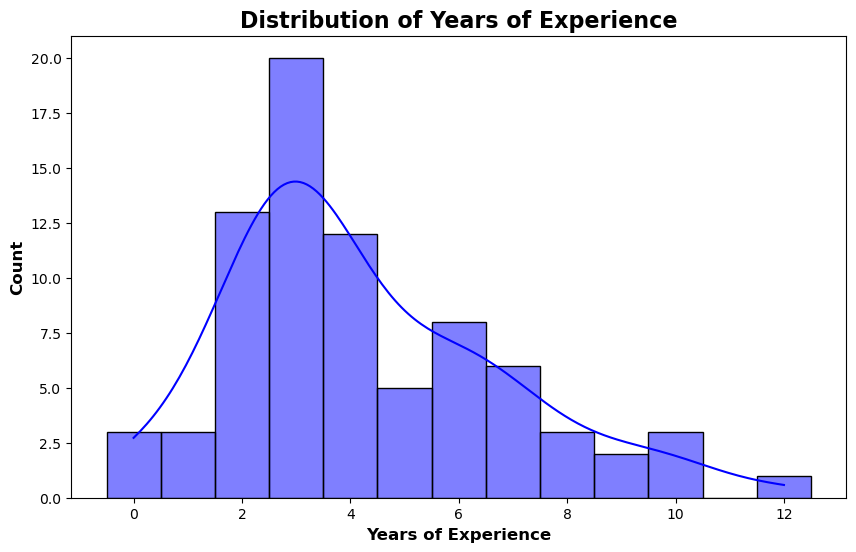

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfna, x='Years of Work Experience', kde=True, color='blue')
plt.title('Distribution of Years of Experience', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [10]:
dfna['Qualification'] = (
    dfna['Qualification']
    .str.replace(r'\.\s*', '', regex=True)  # Remove all full stops
    .str.replace(r'\(.*?\)', '', regex=True)  # Remove text inside parentheses
    .str.replace(r',.*', '', regex=True)  # Remove commas and text after commas
    .str.upper()  # Convert to uppercase
    .fillna("Unknown")  # Replace NaN values with "Unknown"
)
dfna['Qualification'] = dfna['Qualification'].str.replace(r'\b(B)\s+(TECH)\b', r'\1\2', regex=True)
dfna

,Name,Age,Qualification,Subject Area,Place of Education,Coding Language,Spoken Language,Skill Set,Years of Work Experience,Keyword_Category
0,Anil Kumar,NaN,BTECH,Engineering,"Velagapudi Siddhartha Engineering College, Vij...",SQL T SQL,NaN,SQL T SQL Microsoft Business Intelligence MSB...,2.4,SQL Developer
1,Aradhana Tripathi,NaN,MCA,Computer Applications & Information Technology,"AKS University, IIIT Bangalore",SQL SAS R PYTHON,NaN,SQL SAS R Python MS SQL Server T SQL AWS RDS ...,7.0,SQL Developer
2,Buddha Vamsi,29.0,BTECH,Computer Science,JNTUK University,JAVA PYTHON ETC. NA,"English, Telugu",Database Engineer with experience in SQL PLSQ...,2.11,Workday
3,ChinnaSubbarayuduM,NaN,BSC,Computers,"Yogi Vemana University,Kadapa.",XML SQL BASIC SHELL SCRIPTING,Indian,Chinna Subbarayudu M has skills in Workday HC...,5.1,SQL Developer
4,Gopi Krishna,30.0,BTECH,Engineering,JNTU K University,XML XSLT,"English, Telugu, Kannada",Workday HCM Reporting and Integrations XML XS...,3.0,Workday
...,...,...,...,...,...,...,...,...,...,...
74,SSKumar,NaN,MCA,Computer Science and Engineering,"Bharath University, Chennai",XML XSLT PEOPLE CODE,NaN,Proficient in XML XSLT SOAP Web services Work...,6.0,Workday
75,Tatikonda Kiran Kumar,29.0,MCA,Computer Science,SV University,SQL SERVER,"English, Telugu",Microsoft SQL Server Development Coding langu...,3.2,SQL Developer
76,Venkateswarlu B Hexaware,31.0,BTECH,Technology,JNTUH,XML XSLT X PATH,NaN,Workday HCM Workday Advanced Report Writer Co...,7.0,Workday
77,Vinay Kumar,28.0,MBA,Business Administration,Narayana Engineering College,XML XSLT STUDIO,NaN,Workday skills Reports Studio Workday Busines...,4.2,Workday


In [11]:
allowed_qualifications = {'BTECH', 'MTECH', 'MCA', 'BCA', 'BA', 'MA', 'MBA', 'BE', 'BCOM', 'BSC', 'MSC', 'Unknown'}
def filter_qualification(qualification):
    print(f"Input qualification: {qualification}")
    words = qualification.split()  # Split into individual words
    filtered = [word.strip() for word in words if word.strip() in allowed_qualifications]  # Filter allowed words
    print(f"Filtered words: {filtered}")
    return ", ".join(filtered) if filtered else "Unknown"

# Step 3: Apply the filter function to the Qualification column
dfna["Qualification"] = dfna["Qualification"].apply(lambda q: filter_qualification(q) if isinstance(q, str) else "Unknown")

Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: MCA
Filtered words: ['MCA']
Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: BSC
Filtered words: ['BSC']
Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: BSC COMPUTER SCIENCE
Filtered words: ['BSC']
Input qualification: BE 
Filtered words: ['BE']
Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: BTECH 
Filtered words: ['BTECH']
Input qualification: BE
Filtered words: ['BE']
Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: BSC
Filtered words: ['BSC']
Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: BTECH
Filtered words: ['BTECH']
Input qualification: BE
Filtered words: ['BE']
Input qu

C:\Users\polpi\AppData\Local\Temp\ipykernel_15268\309935345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


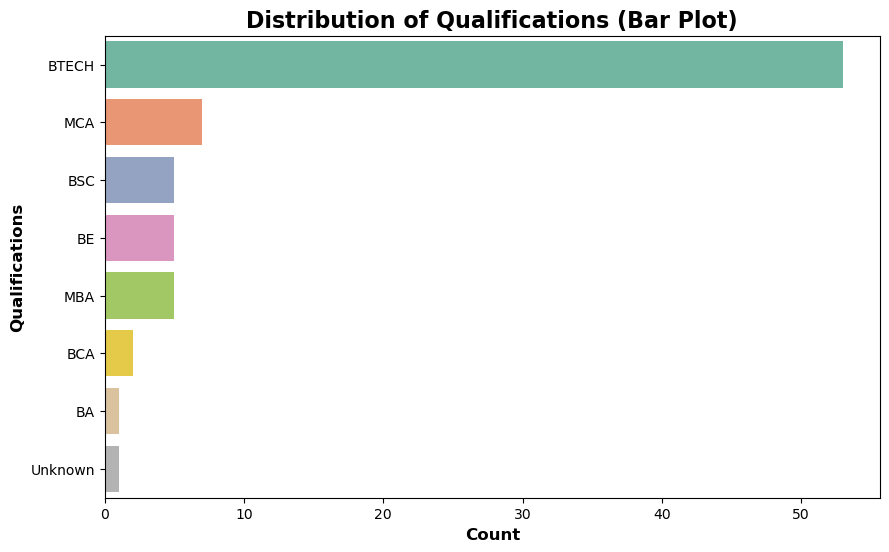

In [12]:
qualification_counts = dfna['Qualification'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(
    x=qualification_counts.values, 
    y=qualification_counts.index, 
    palette="Set2"
)
plt.title('Distribution of Qualifications (Bar Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Qualifications', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [13]:
dfna['Subject Area'] = (
    dfna['Subject Area']
    .str.replace(r'\.\s*', '', regex=True)  # Remove all full stops
    .str.replace(r'\(.*?\)', '', regex=True)  # Remove text inside parentheses
    .str.replace(r',.*', '', regex=True)  # Remove commas and text after commas
    .str.upper()  # Convert to uppercase
    .fillna("Unknown")  # Replace NaN values with "Unknown"
)
dfna

,Name,Age,Qualification,Subject Area,Place of Education,Coding Language,Spoken Language,Skill Set,Years of Work Experience,Keyword_Category
0,Anil Kumar,NaN,BTECH,ENGINEERING,"Velagapudi Siddhartha Engineering College, Vij...",SQL T SQL,NaN,SQL T SQL Microsoft Business Intelligence MSB...,2.4,SQL Developer
1,Aradhana Tripathi,NaN,MCA,COMPUTER APPLICATIONS & INFORMATION TECHNOLOGY,"AKS University, IIIT Bangalore",SQL SAS R PYTHON,NaN,SQL SAS R Python MS SQL Server T SQL AWS RDS ...,7.0,SQL Developer
2,Buddha Vamsi,29.0,BTECH,COMPUTER SCIENCE,JNTUK University,JAVA PYTHON ETC. NA,"English, Telugu",Database Engineer with experience in SQL PLSQ...,2.11,Workday
3,ChinnaSubbarayuduM,NaN,BSC,COMPUTERS,"Yogi Vemana University,Kadapa.",XML SQL BASIC SHELL SCRIPTING,Indian,Chinna Subbarayudu M has skills in Workday HC...,5.1,SQL Developer
4,Gopi Krishna,30.0,BTECH,ENGINEERING,JNTU K University,XML XSLT,"English, Telugu, Kannada",Workday HCM Reporting and Integrations XML XS...,3.0,Workday
...,...,...,...,...,...,...,...,...,...,...
74,SSKumar,NaN,MCA,COMPUTER SCIENCE AND ENGINEERING,"Bharath University, Chennai",XML XSLT PEOPLE CODE,NaN,Proficient in XML XSLT SOAP Web services Work...,6.0,Workday
75,Tatikonda Kiran Kumar,29.0,MCA,COMPUTER SCIENCE,SV University,SQL SERVER,"English, Telugu",Microsoft SQL Server Development Coding langu...,3.2,SQL Developer
76,Venkateswarlu B Hexaware,31.0,BTECH,TECHNOLOGY,JNTUH,XML XSLT X PATH,NaN,Workday HCM Workday Advanced Report Writer Co...,7.0,Workday
77,Vinay Kumar,28.0,MBA,BUSINESS ADMINISTRATION,Narayana Engineering College,XML XSLT STUDIO,NaN,Workday skills Reports Studio Workday Busines...,4.2,Workday


In [14]:
alloted_Subject = {'COMPUTER', 'ENGINEERING', 'MANAGEMENT', 'MARKETING', 'SCIENCE', 'ARTS', 'TECHNOLOGY'}
subject_mappings = {
    'ENGG': 'ENGINEERING',
    'ECE': 'ENGINEERING',
    'EEE': 'ENGINEERING',
    'ENGINEERING': 'ENGINEERING',
    'CS':'COMPUTER',
    'COMPUTER': 'COMPUTER',
    'MANAGEMENT': 'MANAGEMENT',
    'MARKETING': 'MARKETING',
    'SCIENCE': 'SCIENCE',
    'ARTS': 'ARTS',
    'TECHNOLOGY': 'TECHNOLOGY'
}
def categorize_subjects(subject):
    matches = set()
    # Check for each key in the mapping dictionary
    for key, value in subject_mappings.items():
        if key in subject:  # Case-sensitive match since input is already uppercase
            matches.add(value)  # Add the standardized value in uppercase
    # Return the matched categories, joined by a comma
    return ', '.join(matches)

# Apply the function to the Subject Area column to overwrite it
dfna['Subject Area'] = dfna['Subject Area'].apply(categorize_subjects)

# Replace empty values with "UNKNOWN"
dfna['Subject Area'] = dfna['Subject Area'].replace("", "UNKNOWN")

C:\Users\polpi\AppData\Local\Temp\ipykernel_15268\2103339147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


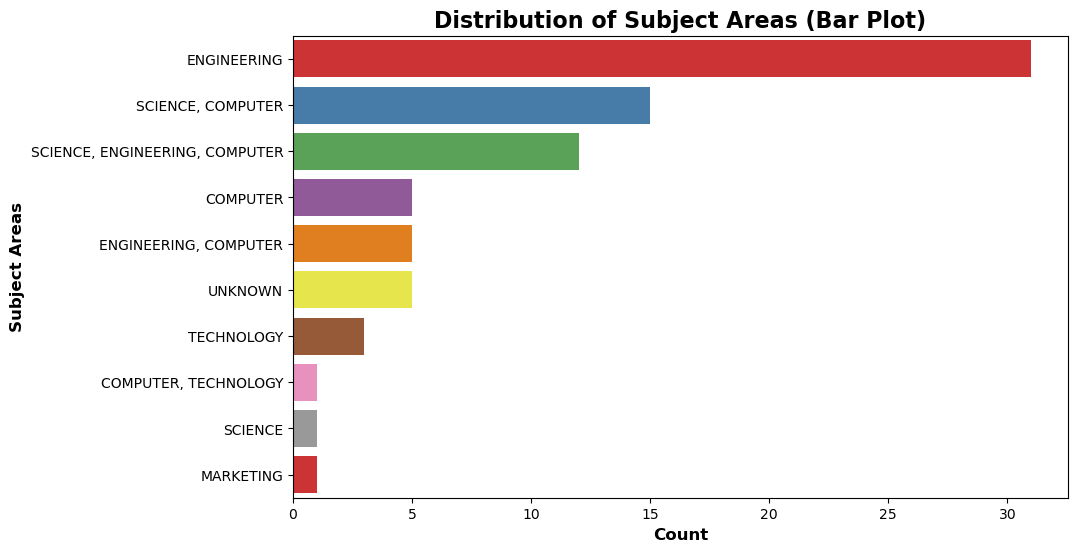

In [15]:
subject_counts = dfna['Subject Area'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(
    x=subject_counts.values, 
    y=subject_counts.index, 
    palette="Set1"
)
plt.title('Distribution of Subject Areas (Bar Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Subject Areas', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [28]:
dfna['Coding Language'] = (
    dfna['Coding Language']
    .str.replace(r'\.\s*', '', regex=True)  # Remove all full stops
    .str.replace(r'\(.*?\)', '', regex=True)  # Remove text inside parentheses
    .str.replace(r',.*', '', regex=True)  # Remove commas and text after commas
    .str.upper()  # Convert to uppercase
    .fillna("Unknown")  # Replace NaN values with "Unknown"
)
dfna

,Name,Age,Qualification,Subject Area,Place of Education,Coding Language,Spoken Language,Skill Set,Years of Work Experience,Keyword_Category,words,chars
0,Anil Kumar,NaN,BTECH,ENGINEERING,"Velagapudi Siddhartha Engineering College, Vij...",SQL T SQL,NaN,SQL SQL MICROSOFT BUSINESS INTELLIGENCE MSBI T...,2.4,SQL Developer,23,144
1,Aradhana Tripathi,NaN,MCA,"COMPUTER, TECHNOLOGY","AKS University, IIIT Bangalore",SQL SAS R PYTHON,NaN,SQL SAS PYTHON SQL SERVER SQL AWS RDS ATHENA M...,7.0,SQL Developer,16,74
2,Buddha Vamsi,29.0,BTECH,"SCIENCE, COMPUTER",JNTUK University,JAVA PYTHON ETCNA,"English, Telugu",DATABASE ENGINEER WITH EXPERIENCE SQL PLSQL VA...,2.11,Workday,60,415
3,ChinnaSubbarayuduM,NaN,BSC,COMPUTER,"Yogi Vemana University,Kadapa.",XML SQL BASIC SHELL SCRIPTING,Indian,CHINNA SUBBARAYUDU HAS SKILLS WORKDAY HCM AND ...,5.1,SQL Developer,52,363
4,Gopi Krishna,30.0,BTECH,ENGINEERING,JNTU K University,XML XSLT,"English, Telugu, Kannada",WORKDAY HCM REPORTING AND INTEGRATIONS XML XSL...,3.0,Workday,35,259
...,...,...,...,...,...,...,...,...,...,...,...,...
74,SSKumar,NaN,MCA,"SCIENCE, ENGINEERING, COMPUTER","Bharath University, Chennai",XML XSLT PEOPLE CODE,NaN,PROFICIENT XML XSLT SOAP WEB SERVICES WORKDAY ...,6.0,Workday,58,416
75,Tatikonda Kiran Kumar,29.0,MCA,"SCIENCE, COMPUTER",SV University,SQL SERVER,"English, Telugu",MICROSOFT SQL SERVER DEVELOPMENT CODING LANGUA...,3.2,SQL Developer,16,106
76,Venkateswarlu B Hexaware,31.0,BTECH,TECHNOLOGY,JNTUH,XML XSLT X PATH,NaN,WORKDAY HCM WORKDAY ADVANCED REPORT WRITER COR...,7.0,Workday,43,303
77,Vinay Kumar,28.0,MBA,UNKNOWN,Narayana Engineering College,XML XSLT STUDIO,NaN,WORKDAY SKILLS REPORTS STUDIO WORKDAY BUSINESS...,4.2,Workday,22,163


In [27]:
coding_language_column = dfna['Coding Language']
unique_languages = set()

for entry in coding_language_column:
    # Split by comma, then split each word by spaces and add to the set
    languages = entry.split(',')  # Split by comma first
    for language in languages:
        unique_languages.add(language.strip())  # Remove leading/trailing spaces

print(unique_languages)


{'', 'ORACLE DB AND PEOPLESOFT', 'XSLT', 'WORKDAY HCM LMS REPORT WRITER EIB CALC FIELDS PAYMENT CONNECTORS WORKDAY STUDIO BUSINESS PROCESS SECURITY DTBENEFITS TALENT ETC', 'HTML CSS3 JAVASCRIPT REACT JS NODEJS JSON', 'HTML CSS JS REACTJS', 'PEOPLESOFT HCM 91 PEOPLE TOOLS 851 ORACLE 11I', 'PEOPLE CODE', 'XMLXSLT', 'CSS JAVASCRIPT WEB SERVICES ANDROID IOSWEB APPLICATION', 'ORACLE PLSQL COBOL', 'JAVASCRIPT REACT', 'HTML5 CSS3 JAVASCRIPT JQUERY REACT JS REDUX', 'REACTJS', 'REACTJS JAVASCRIPT ES6', 'PS QUERY ORACLE SQL DEVELOPER', 'HTML CSS JAVASCRIPT JQUERY PHP MYSQL REACT JS  NODE JS', 'JAVA', 'JAVASCRIPT REACT JS NEST JS YII FRAME WORK ANGULAR JS TYPE ORM MYSQL', 'HTML CSS JAVASCRIPT JQUERY PHP MYSQL REACT JS NODE JS', 'XML XSLT X PATH', 'SQL SAS R PYTHON', 'WORKDAY', 'SQL', 'REACTJS JAVASCRIPT HTML5 CSS3', 'SOAP WEB SERVICES', 'JAVASCRIPT', 'XML XSLT PEOPLE CODE', 'EIB CORE CONNECTOR', 'C PYTHON PEOPLECODE SQR', 'HTML5 CSS3 JAVASCRIPT JQUERY JSON BOOTSTRAP', 'XML XSLT SQL', 'SQL SERVER'

In [31]:
code_mappings = {
    'SQL': 'SQL',
    'ORACLE': 'ORACLE',
    'PEOPLESOFT': 'PEOPLESOFT',
    'BOOTSTRAP': 'BOOTSTRAP',
    'XSLT': 'XSLT',
    'WORKDAY': 'WORKDAY',
    'MVEL': 'MVEL',
    'NEST JS': 'NEST JS',
    'MYSQL': 'MYSQL',
    'XMLXSLT': 'XML XSLT',
    'JSON': 'JSON',
    'PHP': 'PHP',
    'PLSQL': 'PLSQL',
    'TUXEDO': 'TUXEDO',
    'PUTTY': 'PUTTY',
    'WEB SERVICES': 'WEB SERVICES',
    'HTML': 'HTML',
    'NODEJS': 'NODEJS',
    'JAVASCRIPT': 'JAVA, REACT_JS',
    'REACT': 'JAVA, REACT_JS',
    'REACTJS': 'JAVA, REACT_JS',
    'PEOPLE CODE': 'PEOPLECODE',
    'PEOPLECODE': 'PEOPLECODE',
    'JAVA':'JAVA',
    'EIB':'EIB',
    'SAS': 'SAS',
    'PYTHON': 'PYTHON',
    'C ': 'C',
    'C++': 'C, C++',
    'HTML5': 'HTML5',
    'CSS3': 'CSS3',
    'CSS': 'CSS',
    'COBOL': 'COBOL',
    'XML': 'XML',
    'LINUX': 'LINUX',
    'SHELL': 'SHELL'
}
def categorize_subjects(subject):
    matches = set()
    # Check for each key in the mapping dictionary
    for key, value in code_mappings.items():
        if key in subject:  # Case-sensitive match since input is already uppercase
            matches.add(value)  # Add the standardized value in uppercase
    # Return the matched categories, joined by a comma
    return ', '.join(matches)

dfna['Coding Language'] = dfna['Coding Language'].apply(categorize_subjects)

# Replace empty values with "UNKNOWN"
dfna['Coding Language'] = dfna['Coding Language'].replace("", "UNKNOWN")
dfna

,Name,Age,Qualification,Subject Area,Place of Education,Coding Language,Spoken Language,Skill Set,Years of Work Experience,Keyword_Category,words,chars
0,Anil Kumar,NaN,BTECH,ENGINEERING,"Velagapudi Siddhartha Engineering College, Vij...",SQL,NaN,SQL SQL MICROSOFT BUSINESS INTELLIGENCE MSBI T...,2.4,SQL Developer,23,144
1,Aradhana Tripathi,NaN,MCA,"COMPUTER, TECHNOLOGY","AKS University, IIIT Bangalore","SAS, SQL, PYTHON",NaN,SQL SAS PYTHON SQL SERVER SQL AWS RDS ATHENA M...,7.0,SQL Developer,16,74
2,Buddha Vamsi,29.0,BTECH,"SCIENCE, COMPUTER",JNTUK University,"JAVA, PYTHON","English, Telugu",DATABASE ENGINEER WITH EXPERIENCE SQL PLSQL VA...,2.11,Workday,60,415
3,ChinnaSubbarayuduM,NaN,BSC,COMPUTER,"Yogi Vemana University,Kadapa.","SHELL, SQL, XML",Indian,CHINNA SUBBARAYUDU HAS SKILLS WORKDAY HCM AND ...,5.1,SQL Developer,52,363
4,Gopi Krishna,30.0,BTECH,ENGINEERING,JNTU K University,"XML, XSLT","English, Telugu, Kannada",WORKDAY HCM REPORTING AND INTEGRATIONS XML XSL...,3.0,Workday,35,259
...,...,...,...,...,...,...,...,...,...,...,...,...
74,SSKumar,NaN,MCA,"SCIENCE, ENGINEERING, COMPUTER","Bharath University, Chennai","XML, PEOPLECODE, XSLT",NaN,PROFICIENT XML XSLT SOAP WEB SERVICES WORKDAY ...,6.0,Workday,58,416
75,Tatikonda Kiran Kumar,29.0,MCA,"SCIENCE, COMPUTER",SV University,SQL,"English, Telugu",MICROSOFT SQL SERVER DEVELOPMENT CODING LANGUA...,3.2,SQL Developer,16,106
76,Venkateswarlu B Hexaware,31.0,BTECH,TECHNOLOGY,JNTUH,"XML, XSLT",NaN,WORKDAY HCM WORKDAY ADVANCED REPORT WRITER COR...,7.0,Workday,43,303
77,Vinay Kumar,28.0,MBA,UNKNOWN,Narayana Engineering College,"XML, XSLT",NaN,WORKDAY SKILLS REPORTS STUDIO WORKDAY BUSINESS...,4.2,Workday,22,163


In [32]:
dfna['Skill Set']=dfna['Skill Set'].str.upper()
dfna['words'] = dfna['Skill Set'].apply(lambda x: len(str(x).split(" ")))
dfna[['Skill Set','words']]

,Skill Set,words
0,SQL SQL MICROSOFT BUSINESS INTELLIGENCE MSBI T...,20
1,SQL SAS PYTHON SQL SERVER SQL AWS RDS ATHENA M...,12
2,DATABASE ENGINEER WITH EXPERIENCE SQL PLSQL VA...,50
3,CHINNA SUBBARAYUDU HAS SKILLS WORKDAY HCM AND ...,47
4,WORKDAY HCM REPORTING AND INTEGRATIONS XML XSL...,33
...,...,...
74,PROFICIENT XML XSLT SOAP WEB SERVICES WORKDAY ...,54
75,MICROSOFT SQL SERVER DEVELOPMENT CODING LANGUA...,13
76,WORKDAY HCM WORKDAY ADVANCED REPORT WRITER COR...,39
77,WORKDAY SKILLS REPORTS STUDIO WORKDAY BUSINESS...,20


In [33]:
dfna['chars'] = dfna['Skill Set'].str.len()
dfna[['Skill Set','chars']]

,Skill Set,chars
0,SQL SQL MICROSOFT BUSINESS INTELLIGENCE MSBI T...,135
1,SQL SAS PYTHON SQL SERVER SQL AWS RDS ATHENA M...,66
2,DATABASE ENGINEER WITH EXPERIENCE SQL PLSQL VA...,380
3,CHINNA SUBBARAYUDU HAS SKILLS WORKDAY HCM AND ...,352
4,WORKDAY HCM REPORTING AND INTEGRATIONS XML XSL...,254
...,...,...
74,PROFICIENT XML XSLT SOAP WEB SERVICES WORKDAY ...,405
75,MICROSOFT SQL SERVER DEVELOPMENT CODING LANGUA...,101
76,WORKDAY HCM WORKDAY ADVANCED REPORT WRITER COR...,287
77,WORKDAY SKILLS REPORTS STUDIO WORKDAY BUSINESS...,157


In [34]:
dfna

,Name,Age,Qualification,Subject Area,Place of Education,Coding Language,Spoken Language,Skill Set,Years of Work Experience,Keyword_Category,words,chars
0,Anil Kumar,NaN,BTECH,ENGINEERING,"Velagapudi Siddhartha Engineering College, Vij...",SQL,NaN,SQL SQL MICROSOFT BUSINESS INTELLIGENCE MSBI T...,2.4,SQL Developer,20,135
1,Aradhana Tripathi,NaN,MCA,"COMPUTER, TECHNOLOGY","AKS University, IIIT Bangalore","SAS, SQL, PYTHON",NaN,SQL SAS PYTHON SQL SERVER SQL AWS RDS ATHENA M...,7.0,SQL Developer,12,66
2,Buddha Vamsi,29.0,BTECH,"SCIENCE, COMPUTER",JNTUK University,"JAVA, PYTHON","English, Telugu",DATABASE ENGINEER WITH EXPERIENCE SQL PLSQL VA...,2.11,Workday,50,380
3,ChinnaSubbarayuduM,NaN,BSC,COMPUTER,"Yogi Vemana University,Kadapa.","SHELL, SQL, XML",Indian,CHINNA SUBBARAYUDU HAS SKILLS WORKDAY HCM AND ...,5.1,SQL Developer,47,352
4,Gopi Krishna,30.0,BTECH,ENGINEERING,JNTU K University,"XML, XSLT","English, Telugu, Kannada",WORKDAY HCM REPORTING AND INTEGRATIONS XML XSL...,3.0,Workday,33,254
...,...,...,...,...,...,...,...,...,...,...,...,...
74,SSKumar,NaN,MCA,"SCIENCE, ENGINEERING, COMPUTER","Bharath University, Chennai","XML, PEOPLECODE, XSLT",NaN,PROFICIENT XML XSLT SOAP WEB SERVICES WORKDAY ...,6.0,Workday,54,405
75,Tatikonda Kiran Kumar,29.0,MCA,"SCIENCE, COMPUTER",SV University,SQL,"English, Telugu",MICROSOFT SQL SERVER DEVELOPMENT CODING LANGUA...,3.2,SQL Developer,13,101
76,Venkateswarlu B Hexaware,31.0,BTECH,TECHNOLOGY,JNTUH,"XML, XSLT",NaN,WORKDAY HCM WORKDAY ADVANCED REPORT WRITER COR...,7.0,Workday,39,287
77,Vinay Kumar,28.0,MBA,UNKNOWN,Narayana Engineering College,"XML, XSLT",NaN,WORKDAY SKILLS REPORTS STUDIO WORKDAY BUSINESS...,4.2,Workday,20,157


In [35]:
import bs4
import nltk
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def preprocess(sentence):
    sentence = str(sentence).upper()
    sentence = BeautifulSoup(sentence, "html.parser").get_text()    
    # Remove URLs and numbers
    sentence = re.sub(r'http\S+|www\S+', '', sentence)
    sentence = re.sub(r'\d+', '', sentence)   
    # Tokenize the sentence
    tokens = word_tokenize(sentence)    
    # Filter out stopwords and words with length <= 2
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if len(word) > 2 and word not in stop_words and word.isalpha()]

    return " ".join(filtered_words)
dfna['Skill Set'] = dfna['Skill Set'].apply(lambda x: preprocess(x))
dfna

,Name,Age,Qualification,Subject Area,Place of Education,Coding Language,Spoken Language,Skill Set,Years of Work Experience,Keyword_Category,words,chars
0,Anil Kumar,NaN,BTECH,ENGINEERING,"Velagapudi Siddhartha Engineering College, Vij...",SQL,NaN,SQL SQL MICROSOFT BUSINESS INTELLIGENCE MSBI T...,2.4,SQL Developer,20,135
1,Aradhana Tripathi,NaN,MCA,"COMPUTER, TECHNOLOGY","AKS University, IIIT Bangalore","SAS, SQL, PYTHON",NaN,SQL SAS PYTHON SQL SERVER SQL AWS RDS ATHENA M...,7.0,SQL Developer,12,66
2,Buddha Vamsi,29.0,BTECH,"SCIENCE, COMPUTER",JNTUK University,"JAVA, PYTHON","English, Telugu",DATABASE ENGINEER WITH EXPERIENCE SQL PLSQL VA...,2.11,Workday,50,380
3,ChinnaSubbarayuduM,NaN,BSC,COMPUTER,"Yogi Vemana University,Kadapa.","SHELL, SQL, XML",Indian,CHINNA SUBBARAYUDU HAS SKILLS WORKDAY HCM AND ...,5.1,SQL Developer,47,352
4,Gopi Krishna,30.0,BTECH,ENGINEERING,JNTU K University,"XML, XSLT","English, Telugu, Kannada",WORKDAY HCM REPORTING AND INTEGRATIONS XML XSL...,3.0,Workday,33,254
...,...,...,...,...,...,...,...,...,...,...,...,...
74,SSKumar,NaN,MCA,"SCIENCE, ENGINEERING, COMPUTER","Bharath University, Chennai","XML, PEOPLECODE, XSLT",NaN,PROFICIENT XML XSLT SOAP WEB SERVICES WORKDAY ...,6.0,Workday,54,405
75,Tatikonda Kiran Kumar,29.0,MCA,"SCIENCE, COMPUTER",SV University,SQL,"English, Telugu",MICROSOFT SQL SERVER DEVELOPMENT CODING LANGUA...,3.2,SQL Developer,13,101
76,Venkateswarlu B Hexaware,31.0,BTECH,TECHNOLOGY,JNTUH,"XML, XSLT",NaN,WORKDAY HCM WORKDAY ADVANCED REPORT WRITER COR...,7.0,Workday,39,287
77,Vinay Kumar,28.0,MBA,UNKNOWN,Narayana Engineering College,"XML, XSLT",NaN,WORKDAY SKILLS REPORTS STUDIO WORKDAY BUSINESS...,4.2,Workday,20,157


In [36]:
dfna['Skill Set'].head(2)

0    SQL SQL MICROSOFT BUSINESS INTELLIGENCE MSBI T...
1    SQL SAS PYTHON SQL SERVER SQL AWS RDS ATHENA M...
Name: Skill Set, dtype: object

In [37]:
from collections import Counter
from nltk.corpus import stopwords  # Rename the imported stopwords
import string
stopwords_set = set(stopwords.words('english') + ['``', "''"])

totalWords = []
cleaneddata = []

s = dfna['Skill Set'].values
for records in s:
    cleanedText = preprocess(records)
    cleaneddata.append(cleanedText)


all_text = " ".join(cleaneddata)
requiredWords = nltk.word_tokenize(all_text)

totalWords = [
    word for word in requiredWords
    if word not in stopwords_set and word not in string.punctuation
]

wordfreqdist = Counter(totalWords)
mostcommon = wordfreqdist.most_common(50)

print(mostcommon)

[('AND', 92), ('SQL', 75), ('SERVER', 54), ('WORKDAY', 53), ('ORACLE', 37), ('PEOPLESOFT', 37), ('WINDOWS', 33), ('APPLICATION', 32), ('STUDIO', 28), ('TOOLS', 27), ('COMPANIES', 27), ('FOR', 25), ('SERVICES', 23), ('LANGUAGES', 23), ('CORE', 23), ('HTML', 23), ('WEB', 22), ('JAVASCRIPT', 22), ('WORKED', 20), ('HCM', 20), ('CSS', 20), ('DATA', 19), ('WITH', 18), ('KNOWLEDGE', 18), ('XML', 18), ('EIB', 18), ('REACT', 18), ('REPORT', 17), ('BUSINESS', 16), ('INTEGRATION', 16), ('SKILLS', 15), ('XSLT', 15), ('LINUX', 14), ('CODING', 14), ('BOOTSTRAP', 14), ('TECHNOLOGIES', 13), ('WRITER', 13), ('KNOWN', 13), ('DATABASE', 12), ('EXPERIENCE', 12), ('PROGRAMMING', 12), ('CONNECTORS', 12), ('SECURITY', 12), ('MANAGEMENT', 12), ('PEOPLETOOLS', 12), ('DESIGNER', 12), ('FUNCTIONS', 11), ('DEVELOPMENT', 11), ('PEOPLE', 11), ('LIKE', 10)]


In [38]:
most_common_dict = dict(mostcommon)
common_words_df = pd.DataFrame(list(most_common_dict.items()), columns=['Word', 'Count'])
common_words_df

,Word,Count
0,AND,92
1,SQL,75
2,SERVER,54
3,WORKDAY,53
4,ORACLE,37
5,PEOPLESOFT,37
6,WINDOWS,33
7,APPLICATION,32
8,STUDIO,28
9,TOOLS,27


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


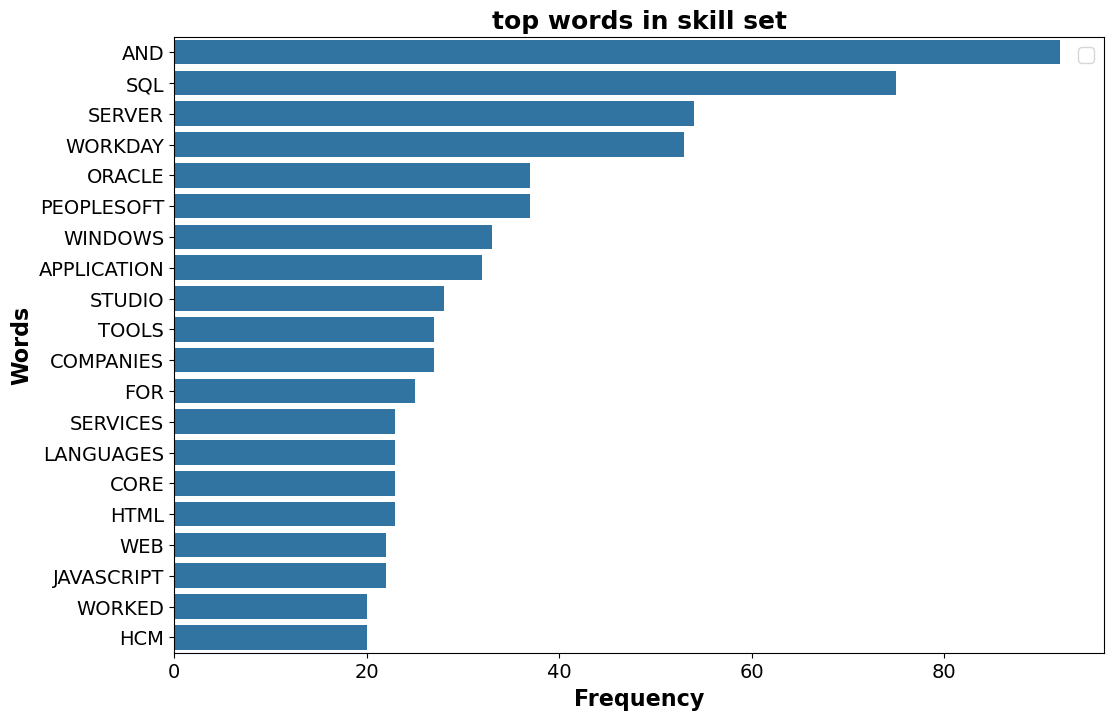

In [39]:
top_words = common_words_df.head(20)
fig, axe = plt.subplots(figsize=(12, 8))
sns.barplot(x=top_words['Count'], y=top_words['Word'], data=top_words, ax=axe)

axe.set_xlabel('Frequency', size=16, fontweight='bold')
axe.set_ylabel('Words', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='best', fontsize='x-large')
plt.title('top words in skill set', fontsize=18, fontweight='bold')
plt.rcParams.update({'xtick.labelsize': 14, 'ytick.labelsize': 14, 'axes.labelsize': 16})
plt.show()

In [40]:
save_path = r"C:\Users\polpi\Desktop\data science\project\project_1\EDA1\dfna2.csv"
dfna.to_csv(save_path, index=False)
print(f"DataFrame saved successfully to {save_path}")

DataFrame saved successfully to C:\Users\polpi\Desktop\data science\project\project_1\EDA1\dfna2.csv
